# Banking Marketing Targets

https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

Tushar (tk22994)

Nandu (nrv379)

Mehdi (ma57795)

Sean (sha567)

## Introduction

Given direct marketing campaign data from a Portuguese banking institution, can we predict if a client will subscribe to a term deposit?

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. These investments usually carry short-term maturities ranging from just a month, to a couple years. A client's money is invested for a certain rate of interest over the whole term.

Term deposits also happen to be a significant source of income for banks. One way that banks will advertise term deposits is through telephonic marketing, which is considered to be one of the more viable marketing methods. However, telephonic marketing campaigns generate large costs through the hiring of call centers. Therefore, it is financially prudent for banks to figure out which customers are the most likely to convert first, and then proceed with targeting them with telephonic marketing after.

## Feature Descriptions

### General Client Data

* age - numeric

* job - categorical

* marital - marital status; categorical

* education - categorical

* default - binary categorical

* balance - average yearly balance; numeric

* housing - has housing loan; binary categorical

* loan - has personal loan; binary categorical

### Data related to last contact of the current campaign

* contact - contact communication type; categorical

* day - last contact day of the month; numerical

* month - last contact month of the year; categorical

* duration - last contact duration, in seconds; numeric

* campaign - number of contacts performed during this campaign and for this client; numeric

* pdays - number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted); numeric

* previous - number of contacts performed before this campaign and for this client; numeric

* poutcome - outcome of the previous marketing campaign; categorical

### Label

* y - has the client subscribed a term deposit?; binary categorical

Ideas:

Class imbalance (SMOTE)

Categorical: one-hot encoding or make numerical (ordinal)?

Look at numerical features

## Data Science

From here, proceed with the data science. Perform data cleaning, data exploration, feature engineering, etc. Use the markdown cells to describe and clarify each part of the process, so that a reader can easily follow along with what you've done.

In [1]:
# import libraries/ standard headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# pandas version we're using
pd.__version__ 

'1.2.5'

### Data Cleaning

Perform data cleaning. Data cleaning is the process of trying to detect and correct data quality issues

Data quality issues

* missing values
* errors/inconsistent values
* duplicate values
* noise and outliers

In [2]:
# read in the dataset
train_df = pd.read_csv("dataset/train.csv", sep=";")
test_df = pd.read_csv("dataset/test.csv", sep=";")

train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


While printing the .info() shows that we do not have any NULL values, further exploration shows that certain categorical columns have an "unknown" category.

Presented below is the category frequencies for all the categorical features. This brings to light some interesting insights:

1. Were the categories inputted correctly (consistency)?

Answer: They appear to be inputted consistently!

2. How prevalent is the "unknown" category throughout the dataset?

Answer: Looking below, we can see that 0.6% of jobs were unknown, 4.1% of educations were unknown, 28.8% of contact methods were unknown, and 81.7% of poutcomes were unknown. We will handle this case-by-case.

3. How might we want to engineer our categorical features?
Answer: We will perform one-hot encoding on non-binary features and map the binary features into 0 and 1 accordingly.

In [ ]:
categorical_features = ["job", "marital", "education", "default", "housing", "loan", 'contact',"poutcome"]
for col in categorical_features:
    print(train_df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    print()

blue-collar      21.5%
management       20.9%
technician       16.8%
admin.           11.4%
services          9.2%
retired           5.0%
self-employed     3.5%
entrepreneur      3.3%
unemployed        2.9%
housemaid         2.7%
student           2.1%
unknown           0.6%
Name: job, dtype: object

married     60.2%
single      28.3%
divorced    11.5%
Name: marital, dtype: object

secondary    51.3%
tertiary     29.4%
primary      15.2%
unknown       4.1%
Name: education, dtype: object

no     98.2%
yes     1.8%
Name: default, dtype: object

yes    55.6%
no     44.4%
Name: housing, dtype: object

no     84.0%
yes    16.0%
Name: loan, dtype: object

cellular     64.8%
unknown      28.8%
telephone     6.4%
Name: contact, dtype: object

unknown    81.7%
failure    10.8%
other       4.1%
success     3.3%
Name: poutcome, dtype: object



Let's focus on two of the more interesting non-binary categorical features in our dataset: job and education.

<AxesSubplot:>

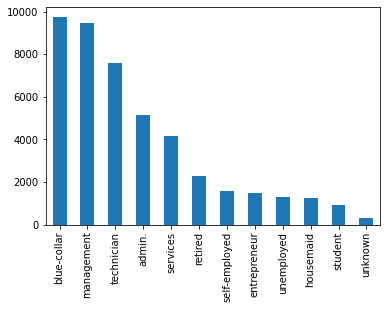

In [ ]:
train_df.job.value_counts().plot.bar()

<AxesSubplot:>

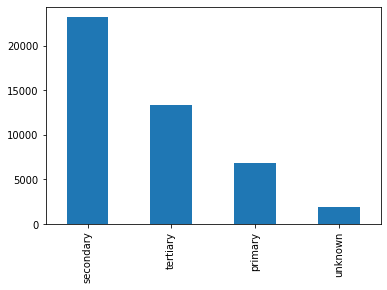

In [ ]:
train_df.education.value_counts().plot.bar()

Since we only have a few unknown jobs, and only a few more unknown educations, and one's education is arguably correlated with one's job, we are going to determine unknown educations through jobs and unknown jobs through educations. To achieve this, we will calculate the education distribution of each job.

In [ ]:
# education distribution per job
for job in train_df["job"].unique():
    education_counts = train_df[train_df["job"] == job]["education"].value_counts().sort_index()
    print(job)
    print(education_counts)
    print()

management
primary       294
secondary    1121
tertiary     7801
unknown       242
Name: education, dtype: int64

technician
primary       158
secondary    5229
tertiary     1968
unknown       242
Name: education, dtype: int64

entrepreneur
primary      183
secondary    542
tertiary     686
unknown       76
Name: education, dtype: int64

blue-collar
primary      3758
secondary    5371
tertiary      149
unknown       454
Name: education, dtype: int64

unknown
primary       51
secondary     71
tertiary      39
unknown      127
Name: education, dtype: int64

retired
primary      795
secondary    984
tertiary     366
unknown      119
Name: education, dtype: int64

admin.
primary       209
secondary    4219
tertiary      572
unknown       171
Name: education, dtype: int64

services
primary       345
secondary    3457
tertiary      202
unknown       150
Name: education, dtype: int64

self-employed
primary      130
secondary    577
tertiary     833
unknown       39
Name: education, dtype: int

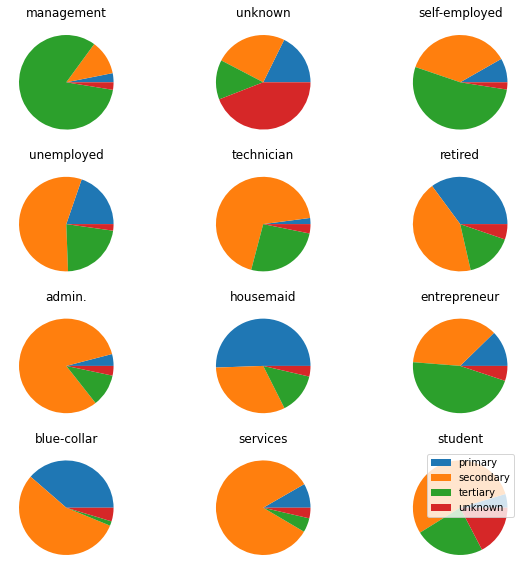

In [ ]:
fig, axs = plt.subplots(4,3, figsize=(10,10))
ij = 0
i = 0
j = 0
for job in train_df["job"].unique():
    education_counts = train_df[train_df["job"] == job]["education"].value_counts().sort_index()
    patches, texts = axs[i,j].pie(education_counts)
    axs[i,j].set_title(job)
    plt.legend(patches, ['primary','secondary','tertiary','unknown'], loc="best")
    ij += 1
    i = ij % 4
    j = ij % 3

When we replace the education values in our dataset, we're going to try to maintain the relative distribution we had before.

That is, say we had 10 unknowns and 10 knowns for a certain job category. If 2 had primary education, 3 had secondary education, and 5 had tertiary education, then we want to turn 2 of the unknowns into primary, 3 of the unknowns into secondary, and 5 of the unknowns into tertiary.

We believe this is justified because there are relatively few unknowns in either the job or education columns in the first place, and this will help us maintain the prior distribution while eliminating unknowns.

In [ ]:
# first we calculate the conditional distributions
# which will exclude the unknowns
education_percentages = dict()
for job in train_df["job"].unique():
    education_counts = train_df[train_df["job"] == job]["education"].value_counts()
    total = education_counts["tertiary"] + education_counts["secondary"] + education_counts["primary"]
    education_percentages[job] = {}
    tertiary_percentage = education_counts["tertiary"] / total
    secondary_percentage = education_counts["secondary"] / total
    primary_percentage = education_counts["primary"] / total
    total_unknown = education_counts["unknown"]
    education_percentages[job]["tertiary"] = math.ceil(tertiary_percentage * total_unknown)
    education_percentages[job]["secondary"] = math.ceil(secondary_percentage * total_unknown)
    education_percentages[job]["primary"] = math.ceil(primary_percentage * total_unknown)

# then we are going to distribute the unknowns
# based on our calculations
for index, row in train_df.iterrows():
    if row["education"] == "unknown":
        if education_percentages[row["job"]]["tertiary"] != 0:
            train_df.loc[index, ["education"]] = "tertiary"
            education_percentages[row["job"]]["tertiary"] -= 1
        elif education_percentages[row["job"]]["secondary"] != 0:
            train_df.loc[index, ["education"]] = "secondary"
            education_percentages[row["job"]]["secondary"] -=1
        else:
            train_df.loc[index, ["education"]] = "primary"
    else:
        continue


If we display the updated pie charts, we can visually confirm if our proportions match with what we had before, just without the unknowns.

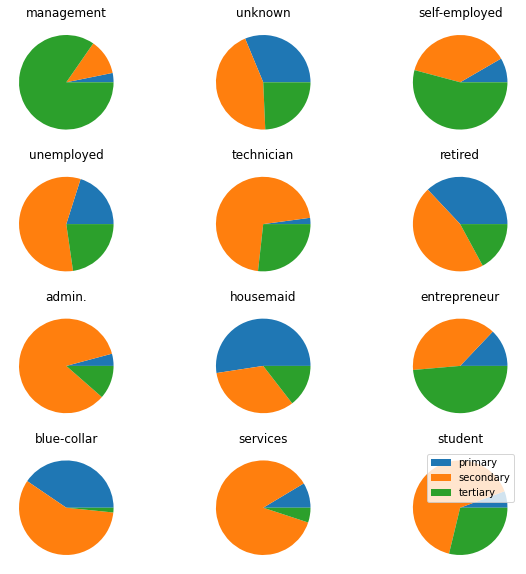

In [ ]:
# after replacement
fig, axs = plt.subplots(4,3, figsize=(10,10))
ij = 0
i = 0
j = 0
for job in train_df["job"].unique():
    education_counts = train_df[train_df["job"] == job]["education"].value_counts().sort_index()
    patches, texts = axs[i,j].pie(education_counts)
    axs[i,j].set_title(job)
    plt.legend(patches, ['primary','secondary','tertiary'], loc="best")
    ij += 1
    i = ij % 4
    j = ij % 3

Since there are more job types than education types, we are just going to go ahead and replace the unknown jobs through mode instead. We can see that tertiary is usually management, secondary is usually blue-collar, and primary is usually blue-collar.

In [ ]:
for education in train_df["education"].unique():
    job_counts = train_df[train_df["education"] == education]["job"].value_counts()
    print(education)
    print(job_counts)
    print()

tertiary
management       7801
technician       1968
self-employed     833
entrepreneur      686
admin.            572
retired           366
unemployed        289
student           223
services          202
housemaid         173
blue-collar       149
unknown            39
Name: job, dtype: int64

secondary
blue-collar      5371
technician       5229
admin.           4219
services         3457
management       1121
retired           984
unemployed        728
self-employed     577
entrepreneur      542
student           508
housemaid         395
unknown            71
Name: job, dtype: int64

unknown
blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
unknown          127
retired          119
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

primary
blue-collar      3758
retired           795
housemaid         627
services          345
management        294


In [ ]:
train_df.loc[(train_df.job == "unknown") & (train_df.education == "tertiary"), "job"] = "management"
train_df.loc[(train_df.job == "unknown") & (train_df.education == "secondary"), "job"] = "blue-collar"
train_df.loc[(train_df.job == "unknown") & (train_df.education == "primary"), "job"] = "blue-collar"

Looking at the pdays column, we notice that the majority of rows actually have -1 for pdays. This means that a minority of rows have an actual ordinal numerical value for pdays. Therefore, let us convert this into a binary categorical variable that shows if the client was even contacted at all (yes/no).

In [3]:
print(train_df[train_df['pdays'] == -1]['pdays'].count())
print(train_df[train_df['pdays'] != -1]['pdays'].count())

36954
8257


In [4]:
train_df.pdays = train_df.pdays.map(lambda x: 0 if x == -1 else 1)

In [5]:
train_df.pdays.value_counts()

0    36954
1     8257
Name: pdays, dtype: int64

What about our label?

**Write about how we will use SMOTE because of class imbalances (Slides #6)**

In [ ]:
train_df['y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

no     88.3%
yes    11.7%
Name: y, dtype: object

In [ ]:
contact_mode = train_df["contact"].mode()
train_df["contact"].replace(["unknown"], contact_mode,inplace = True)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,tertiary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
4,33,management,single,tertiary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no


In [ ]:
# maybe we should just drop this column???
train_df["poutcome"].replace(["unknown"], "other",inplace = True)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,tertiary,no,1506,yes,no,cellular,5,may,92,1,-1,0,other,no
4,33,management,single,tertiary,no,1,no,no,cellular,5,may,198,1,-1,0,other,no


replace pdays -1 with max (of pdays)?

For now we have decided not to

In [ ]:
# max_pdays = train_df['pdays'].max()
# train_df['pdays'].replace([-1], max_pdays, inplace = True)
# train_df

### Exploratory Data Analysis (EDA)

#### Noise vs Outliers

* outliers - anomalous objects with characteristics that are different from, or unusual with respect to, the rest of the data
* noise - random errors in the data

<AxesSubplot:xlabel='job', ylabel='age'>

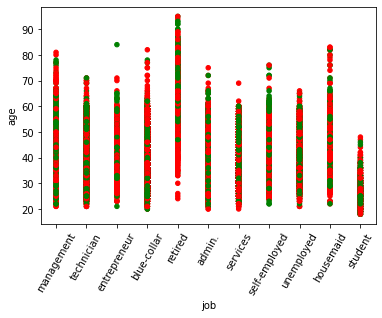

In [ ]:
colors = {'no': 'red', 'yes': 'green'}
train_df.plot.scatter('job', 'age', c=train_df['y'].map(colors), rot=60)

retired folks seem more likely to invest in low risk securities!

### Feature Engineering

feature transformation or feature creation

#### feature engineer day of week column

In [ ]:
# create year column
curYear = 2008
janStretch = False
yearList = []
for ind in train_df.index:
    if train_df['month'][ind] == 'jan' and not janStretch:
        janStretch = True
        curYear += 1  
    elif train_df['month'][ind] != 'jan':
        janStretch = False
    yearList.append(curYear) 
train_df['year'] = yearList

# create day of week column
# create a list then add to dataframe train_df
temp = pd.Timestamp('2022-4-5')
monthToNum = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
                'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

dayOfWkList = []
for ind in train_df.index:
    year = train_df['year'][ind]
    month = train_df['month'][ind]
    day = train_df['day'][ind]
    timestampStr = str(year) + '-' + str(month) + '-' + str(day)
    dayOfWk = pd.Timestamp(timestampStr)
    dayOfWkList.append(dayOfWk.day_of_week)
train_df['dayOfWk'] = dayOfWkList
train_df[['year','month','day','dayOfWk']].head()

,year,month,day,dayOfWk
0,2008,may,5,0
1,2008,may,5,0
2,2008,may,5,0
3,2008,may,5,0
4,2008,may,5,0


#### feature engineer 
one-hot encoding: turn  categorical data to numerical data 
while not mathematically imply any ordinal relationship between the classes

In [ ]:
# one hot encoding for all categorical columns
from sklearn.preprocessing import OneHotEncoder
categorical_list = ["job", "marital", "poutcome"]
for col in categorical_list:
    encoder = OneHotEncoder()
    # makes a dataset. each column is a value in the column from the original dataset. the new cloumns are sorted based on the values!
    col_encoder = pd.DataFrame(encoder.fit_transform(train_df[[col]]).toarray())
    # get the list of values in the current column and sort them so you can change the names
    list_of_vals = train_df[col].unique()
    list_of_vals.sort()
    col_encoder.columns = list_of_vals
    train_df = train_df.join(col_encoder)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,47,blue-collar,married,tertiary,no,1506,yes,no,cellular,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,33,management,single,tertiary,no,1,no,no,cellular,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### Binary Categorical Variables

Let us map all binary categorical variables (including y) so that "yes" = 1, and "no" = 0.

Additionally, let contact be mapped so that "cellular" = 1 and "telephone" = 0

NOTE: should we do this for test set too?

In [ ]:
# includes label
binary_categorical = ['default','housing','loan','y']

for col in binary_categorical:
    train_df[col] = train_df[col].map({'yes': 1, 'no': 0})

# includes contact because we removed the "other" value
train_df['contact'] = train_df['contact'].map({'cellular': 1, 'telephone': 0})

train_df[binary_categorical + ['contact']].head()

,default,housing,loan,y,contact
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,1,0,1
3,0,1,0,0,1
4,0,0,0,0,1


## Modeling

Then move on to the modeling, and continue to use the markdown cells to walk a reader through your process. 

#### svm, neural nets, look at paper

## Results

Finally, display and analyze your results.

### Conclusion

Include a final conclusion - this may be an analysis of which model worked best, or which feature engineering worked best, or it may be any interesting insights you discovered about your data, or anything at all that you want to conclude from your work. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=825dc3e6-d277-4188-bb22-3ec9a91d5af7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>